# Build and Evaluate an ANN for Wine Quality

## 1. Preprocess and Explore the Dataset

### 1.1 Installing and Importing Python libraries (numpy, pandas, tensorflow, and matplotlib):

In [1]:
# %pip install numpy
# %pip install pandas
# %pip install tensorflow
# %pip install sklearn
# %pip install matplotlib
# %pip install seaborn
# %pip install optuna

In [2]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd
# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Data Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import optuna

2025-02-05 13:30:04.906769: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-05 13:30:05.038675: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-05 13:30:05.164542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738755005.284182    1011 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738755005.323257    1011 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 13:30:05.621368: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### 1.2 Loading the Data:

In [3]:
data = pd.read_csv('winequality-white.csv', delimiter=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Early Insights:**
- We have 4898 rows with 12 columns with numerical values.
- there aren't any missing data.
- there are many features with a big difference between third percentile and the maximum value that indication of right skewed distrbution and maybe an outliers, we need to handle it later.

### 1.3 Checking for Outliers:

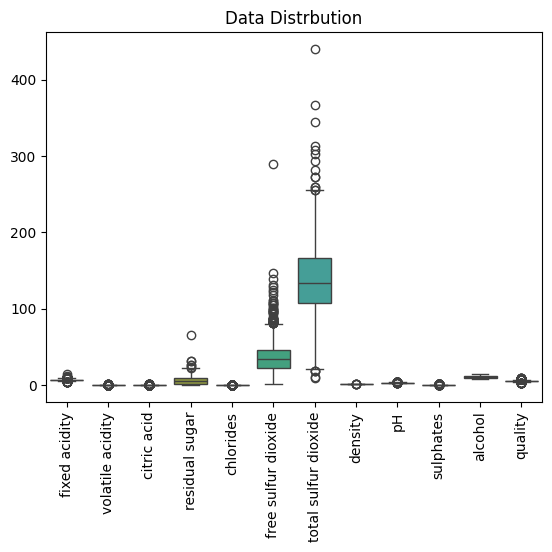

In [6]:
sns.boxplot(data)
plt.title('Data Distrbution')
plt.xticks(rotation=90)
plt.show()

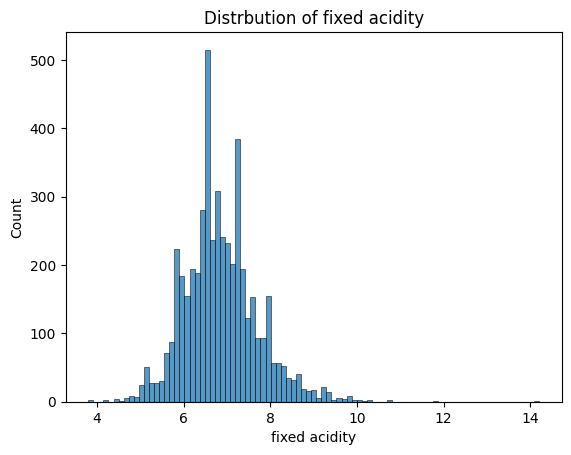

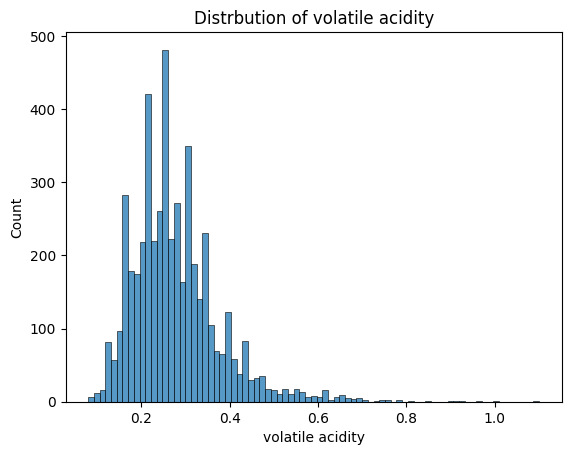

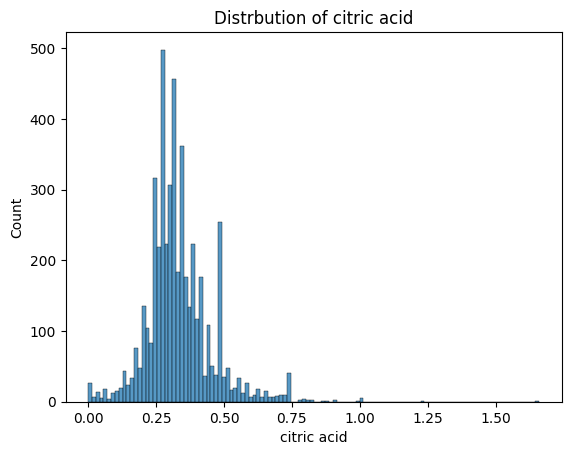

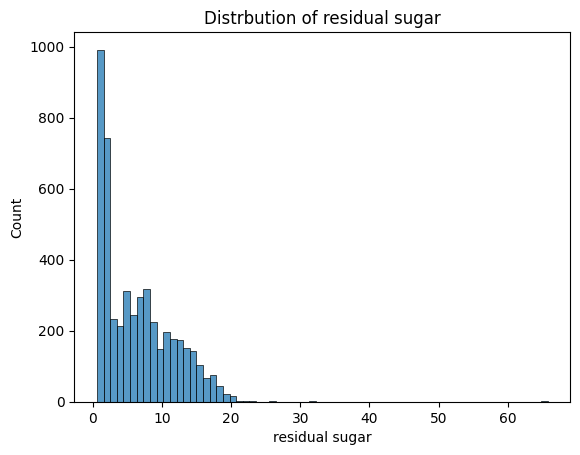

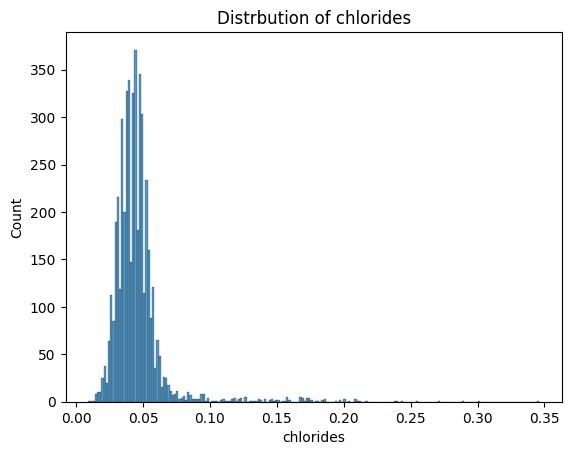

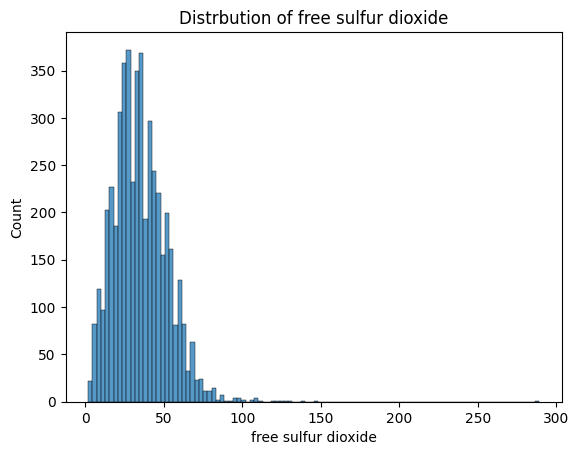

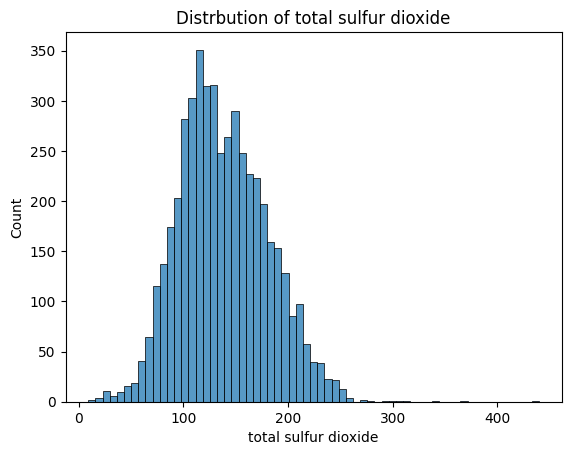

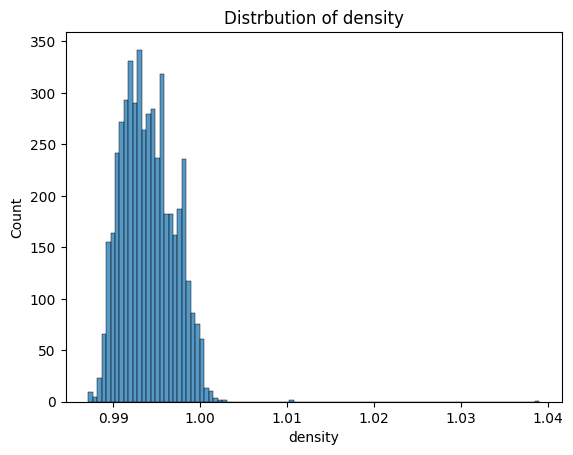

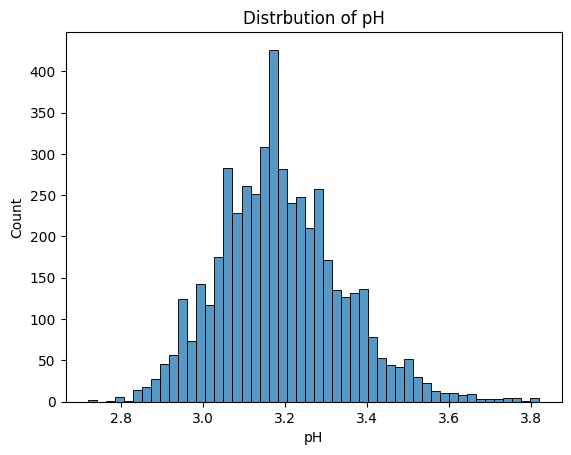

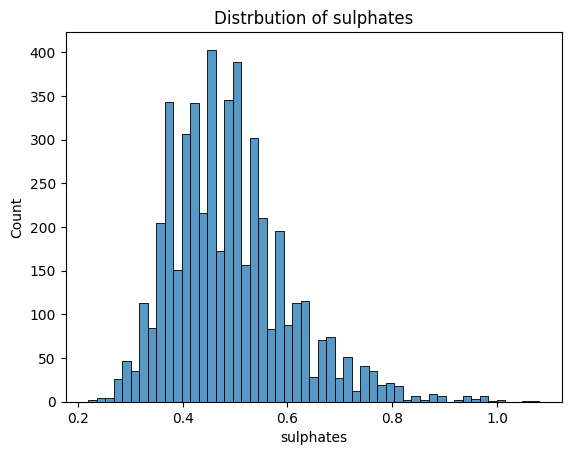

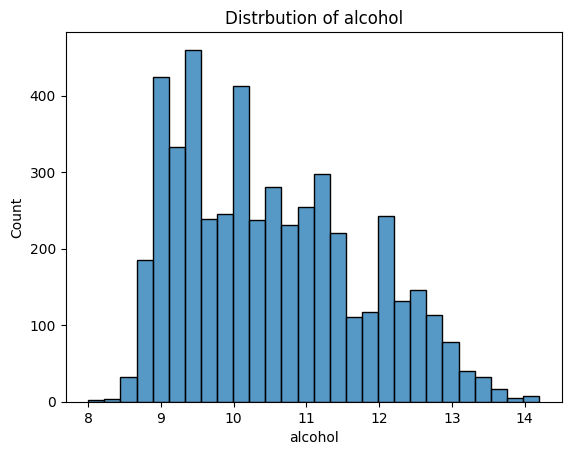

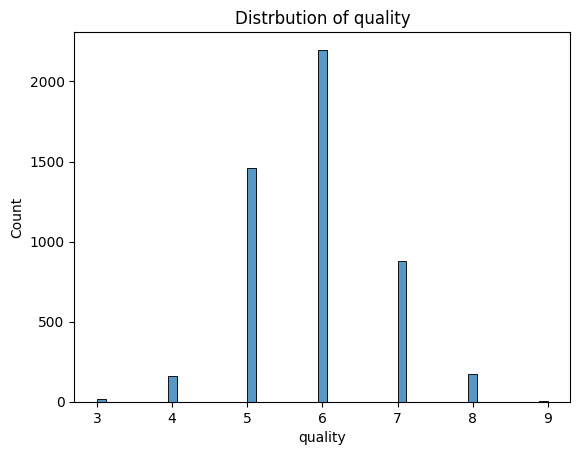

In [7]:
for col in data.columns:
    sns.histplot(data[col])
    plt.title(f'Distrbution of {col}')
    plt.show()

There are a lot of right skewed distrbutions with outlier values, but I decided to keep them, because of the context of our analysis, we need to be able to predict the quality of the wine, and maybe the far values that can indicate very poor quality or the reverse.

### 1.4 Spliting the data to test and train:

we will use stratify sampling because our target classes are not balanced.

In [8]:
X = data.drop(columns='quality')
y = data['quality']

In [9]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, stratify=y, test_size=0.2)

In [10]:
y_train.value_counts()/y_train.shape[0]

quality
6    0.448698
5    0.297601
7    0.179684
8    0.035733
4    0.033180
3    0.004084
9    0.001021
Name: count, dtype: float64

In [11]:
y_test.value_counts()/y_test.shape[0]

quality
6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: count, dtype: float64

the ratio of the quality class on the train and test datasets are almost identical.

### 1.5 Encode the target labels:

In [12]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
y_train.head()

,3,4,5,6,7,8,9
1056,False,False,False,True,False,False,False
4094,False,False,False,False,True,False,False
2551,False,False,False,True,False,False,False
609,False,False,False,True,False,False,False
4033,False,False,False,True,False,False,False


### 1.6 Normalize the features:

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train[0]

array([ 0.78719639, -0.67341903,  0.03977437, -1.01805032,  0.63102777,
       -0.54148257, -0.64107608, -0.30775548,  2.12685216, -0.18125761,
        0.15031878])

## 2. Build and Train the ANN:

In [16]:
# Define function to create ANN model
def create_model(n_neurons=64, activation='relu', learning_rate=0.001):
    model = keras.Sequential([
        layers.Dense(n_neurons, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(n_neurons//2, activation=activation),
        layers.Dense(y_train.shape[1], activation='softmax')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

/home/ay7/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


W0000 00:00:1738755137.351139    1011 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3726 - loss: 1.6088 - val_accuracy: 0.5520 - val_loss: 1.2286
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5387 - loss: 1.1938 - val_accuracy: 0.5776 - val_loss: 1.1371
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5282 - loss: 1.1438 - val_accuracy: 0.5806 - val_loss: 1.0956
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5428 - loss: 1.1016 - val_accuracy: 0.5510 - val_loss: 1.0850
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5534 - loss: 1.0777 - val_accuracy: 0.5653 - val_loss: 1.0691
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5473 - loss: 1.0584 - val_accuracy: 0.5755 - val_loss: 1.0571
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5697 - loss: 1.0332 - val_accuracy: 0.5898 - val_loss: 1.0503
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5623 - loss: 1.0394 - val_accuracy: 0.5867 - val_loss: 1.0473
Epo

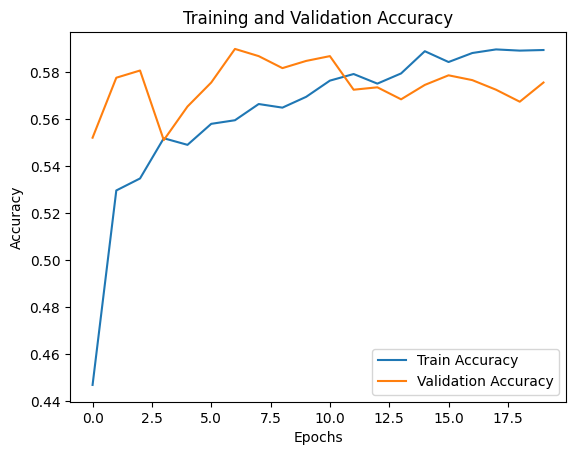

In [17]:
# Train initial model
model = create_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=1)

# Plot training process
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

## 3. Hyperparameter tuning using Optuna:

[I 2025-02-05 13:34:57,041] A new study created in memory with name: no-name-39a3cb7e-d9f3-4510-87e9-c05e27dcc46a
/home/ay7/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-02-05 13:35:07,194] Trial 0 finished with value: 0.5826530456542969 and parameters: {'n_neurons': 96, 'activation': 'tanh', 'learning_rate': 0.0009981188656873652}. Best is trial 0 with value: 0.5826530456542969.
/home/ay7/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, *

Best hyperparameters: {'n_neurons': 96, 'activation': 'tanh', 'learning_rate': 0.003391185007641051}


/tmp/ipykernel_1011/585525646.py:14: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


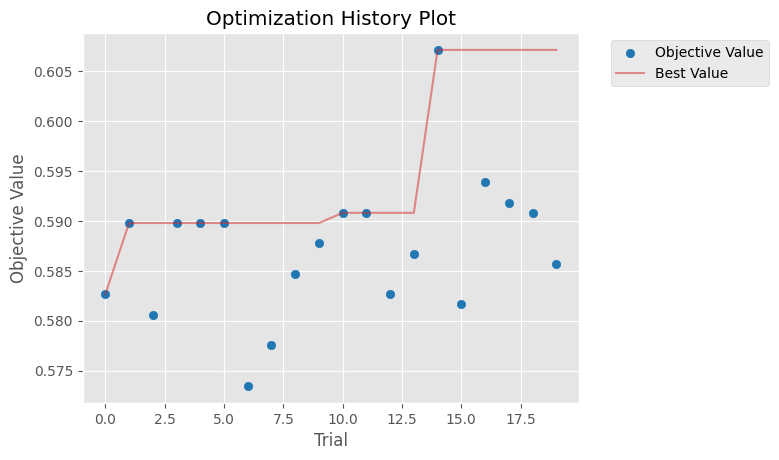

In [18]:
def objective(trial):
    n_neurons = trial.suggest_int('n_neurons', 32, 128, step=32)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    
    model = create_model(n_neurons, activation, learning_rate)
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0, validation_data=(X_test, y_test))
    val_accuracy = max(history.history['val_accuracy'])
    return val_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_params)
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()

## 4. Evaluate the trained ANN on the test set:

### 4.1 Train NN with best parameter:

In [19]:
best_params = study.best_params
final_model = create_model(**best_params)
final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50


/home/ay7/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4274 - loss: 1.4292 - val_accuracy: 0.5653 - val_loss: 1.0909
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4992 - loss: 1.1152 - val_accuracy: 0.5612 - val_loss: 1.0715
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5304 - loss: 1.0679 - val_accuracy: 0.5531 - val_loss: 1.0675
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5400 - loss: 1.0693 - val_accuracy: 0.5704 - val_loss: 1.0501
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5334 - loss: 1.0532 - val_accuracy: 0.5776 - val_loss: 1.0504
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5581 - loss: 1.0362 - val_accuracy: 0.5439 - val_loss: 1.0545
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5579 - loss: 1.0265 - val_accuracy: 0.5786 - val_loss: 1.0382
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5506 - loss: 0.9959 - val_accuracy: 0.5837 - val_

### 4.2 Evalute using Test set:

In [20]:
y_pred = final_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [21]:
# Compute metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")

Accuracy: 0.5755102040816327
Precision: 0.5728313212187887
Recall: 0.5755102040816327
F1 Score: 0.5712543165736111


/home/ay7/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


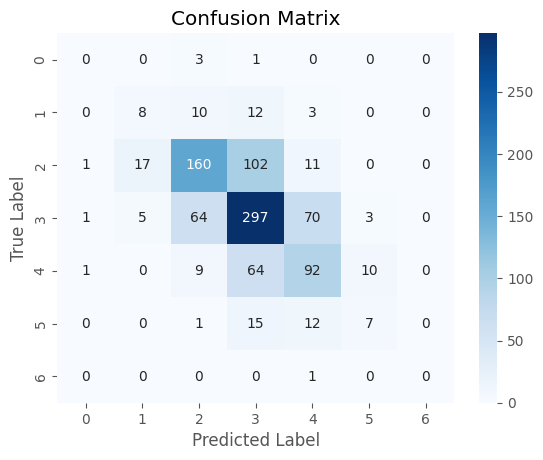

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()